# 1. tensorflow v2.xx에서 v1사용하기

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd


## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run() 을 통해 값을 확인

In [5]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [7]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [8]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1,node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [10]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [11]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균 0, 표준편차가 1인 난수 실수 2개(정규분포이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([0.3511526], dtype=float32), array([-0.20769261], dtype=float32)]

In [14]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([1.3397081], dtype=float32)

# 2. tensorflow v1 을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [16]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse; 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프, 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer

'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:19.39767074584961, W:[-0.39823622], b:[0.05057335]
200번째 cost:0.004319420084357262, W:[1.0761487], b:[0.8268958]
400번째 cost:0.0016493549337610602, W:[1.0470552], b:[0.8930324]
600번째 cost:0.0006298046209849417, W:[1.0290772], b:[0.9339006]
800번째 cost:0.0002404841361567378, W:[1.0179677], b:[0.9591549]
1000번째 cost:9.183032670989633e-05, W:[1.0111032], b:[0.97476006]
1200번째 cost:3.506489156279713e-05, W:[1.006861], b:[0.98440343]
1400번째 cost:1.3390235835686326e-05, W:[1.0042398], b:[0.990362]
1600번째 cost:5.1128990889992565e-06, W:[1.00262], b:[0.9940443]
1800번째 cost:1.9526694359228713e-06, W:[1.0016191], b:[0.9963194]
2000번째 cost:7.461919153683993e-07, W:[1.001001], b:[0.99772495]
2200번째 cost:2.8534455509543477e-07, W:[1.0006189], b:[0.99859303]
2400번째 cost:1.092798314061838e-07, W:[1.000383], b:[0.9991294]
2600번째 cost:4.1934239192187306e-08, W:[1.0002373], b:[0.9994607]
2800번째 cost:1.6165571992132755e-08, W:[1.0001476], b:[0.9996653]
3000번째 cost:6.22662810201291e-09, W:[1.000091

In [17]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W,b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [18]:
W_, b_ = sess.run([W,b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [19]:
def predict(x):
    return W_[0]*x + b_[0]

In [23]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

예측값은  24.000181257724762


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [25]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [29]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:x_data,
                                                    y:y_data})
    if step%200 ==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:32.213539123535156, W:[0.8221204], b:[3.5955157]
200번째 cost:0.22035053372383118, W:[1.8403633], b:[1.8532557]
400번째 cost:0.02167334407567978, W:[1.9499345], b:[1.2675993]
600번째 cost:0.002131765242666006, W:[1.9842983], b:[1.083925]
800번째 cost:0.00020967787713743746, W:[1.9950756], b:[1.026321]
1000번째 cost:2.0621857402147725e-05, W:[1.9984556], b:[1.0082544]
1200번째 cost:2.028185463132104e-06, W:[1.9995157], b:[1.0025887]
1400번째 cost:1.9956209484917053e-07, W:[1.999848], b:[1.000812]
1600번째 cost:1.963477380684253e-08, W:[1.9999523], b:[1.0002546]
1800번째 cost:1.9601884559961036e-09, W:[1.999985], b:[1.0000805]
2000번째 cost:2.0509105524979532e-10, W:[1.999995], b:[1.0000262]
2200번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2400번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2600번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2800번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.00001

In [30]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.], dtype=float32)

In [31]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.      , 12.999998, 14.999996], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale 조정X)

In [34]:
# H = 2x+1
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(1001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:x_data,
                                                    y:y_data})
    if step%200 ==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:4888.86865234375, W:[7.539535], b:[1.7903609]
200번째 cost:83.82205200195312, W:[10.160594], b:[-0.32180178]
400번째 cost:83.51347351074219, W:[10.259671], b:[-1.0554005]
600번째 cost:83.48516845703125, W:[10.289681], b:[-1.2776028]
800번째 cost:83.48255920410156, W:[10.298772], b:[-1.344906]
1000번째 cost:83.48233032226562, W:[10.301525], b:[-1.3652921]


In [33]:
# cost값이 멈춤

## 2.4 scale이 다른 데이터의 linear regression 을 구현 (조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                        X - Xmin
    * normalization= --------------
                        Xmax - Xmin
            * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
- standardization(표준화) : 평균0, 표준편차1로 조정
                        X - Xmean(평균)
    standardization = ------------------
                        Xstd(표준편차)
            * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)

In [36]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data, scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ] [0.         0.13043478 0.70652174 0.83695652 1.        ]


In [ ]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data,y_data, scaled_x_data, scaled_y_data])


array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [48]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(20001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:scaled_x_data,
                                                    y:scaled_y_data})
    if step%1000 ==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:0.3929609954357147, W:[0.6059038], b:[-0.3460904]
1000번째 cost:0.014403236098587513, W:[0.87201095], b:[0.08487585]
2000번째 cost:0.011110510677099228, W:[0.9152915], b:[0.10911261]
3000번째 cost:0.01063506118953228, W:[0.9357729], b:[0.10217593]
4000번째 cost:0.010347503237426281, W:[0.95085984], b:[0.09452689]
5000번째 cost:0.010167131200432777, W:[0.9627176], b:[0.08829017]
6000번째 cost:0.010053937323391438, W:[0.9721031], b:[0.08333496]
7000번째 cost:0.009982903487980366, W:[0.97953755], b:[0.07940838]
8000번째 cost:0.009938325732946396, W:[0.9854268], b:[0.07629776]
9000번째 cost:0.009910354390740395, W:[0.9900924], b:[0.07383361]
10000번째 cost:0.009892800822854042, W:[0.9937876], b:[0.07188159]
11000번째 cost:0.009881784208118916, W:[0.9967154], b:[0.07033531]
12000번째 cost:0.00987487193197012, W:[0.9990346], b:[0.06911049]
13000번째 cost:0.009870540350675583, W:[1.00087], b:[0.06814069]
14000번째 cost:0.009867814369499683, W:[1.0023224], b:[0.06737264]
15000번째 cost:0.00986610446125269, W:[1.00

In [60]:
# 예측 : 모델에 scale 조정된 값으로 예측=> scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.17700645]
 [0.28883862]]
결과 :
[[19.284594]
 [29.573153]]


In [62]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

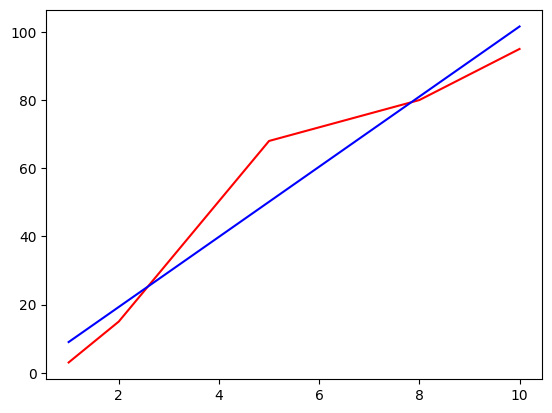

In [58]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data,y_hat, 'b')

In [66]:
# 라이브러리를 쓰고 표준화 (StandardScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [67]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:1.6177746057510376, W:[0.803348], b:[1.2335782]
600째 : cost:0.2034211903810501, W:[0.91857207], b:[0.37109992]
1200째 : cost:0.07542230188846588, W:[0.9532352], b:[0.1116389]
1800째 : cost:0.06383836269378662, W:[0.9636628], b:[0.03358462]
2400째 : cost:0.06279002130031586, W:[0.96680003], b:[0.01010335]
3000째 : cost:0.06269514560699463, W:[0.96774375], b:[0.00303943]
3600째 : cost:0.06268654763698578, W:[0.9680272], b:[0.00091437]
4200째 : cost:0.0626857727766037, W:[0.9681116], b:[0.00027508]
4800째 : cost:0.06268569827079773, W:[0.96813506], b:[8.276692e-05]
5400째 : cost:0.06268568336963654, W:[0.96813506], b:[2.4917905e-05]
6000째 : cost:0.06268569082021713, W:[0.96813506], b:[7.5146063e-06]
6600째 : cost:0.06268569082021713, W:[0.96813506], b:[2.279623e-06]
7200째 : cost:0.06268569827079773, W:[0.96813506], b:[7.0514983e-07]
7800째 : cost:0.06268569082021713, W:[0.96813506], b:[2.3313359e-07]
8400째 : cost:0.06268569082021713, W:[0.96813506], b:[8.747359e-08]
9000째 : cost:0.0626856

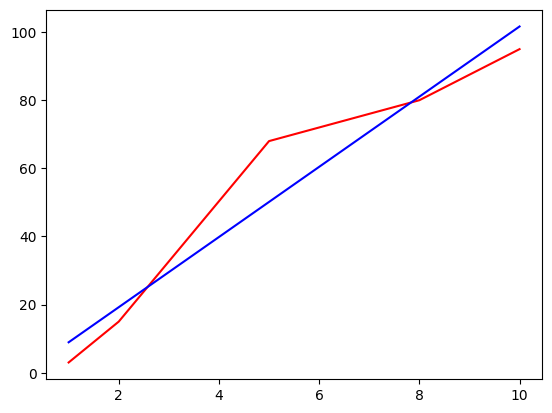

In [68]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')